In [1]:
import pandas as pd
import geopandas as gpd
import mapclassify as mc
import matplotlib.pyplot as plt

In [2]:
covid_data_dir_0 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_0.csv'
covid_data_dir_1 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_1.csv'
covid_data_dir_2 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_2.csv'
covid_data_dir_3 = r'data/raw/DOH COVID Data Drop_ 20220521 - 04 Case Information_batch_3.csv'

bnd_data_dir = r'data/processed/merge.shp'

In [3]:
df_covid_0 = pd.read_csv(covid_data_dir_0)
df_covid_1 = pd.read_csv(covid_data_dir_1)
df_covid_2 = pd.read_csv(covid_data_dir_2)
df_covid_3 = pd.read_csv(covid_data_dir_3)

df_bnd = gpd.read_file(bnd_data_dir)

/tmp/ipykernel_59801/3910334582.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_0 = pd.read_csv(covid_data_dir_0)
/tmp/ipykernel_59801/3910334582.py:4: DtypeWarning: Columns (7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_3 = pd.read_csv(covid_data_dir_3)


In [4]:
df_covid = pd.concat([df_covid_0,df_covid_1,df_covid_2,df_covid_3],axis=0)

<AxesSubplot:xlabel='DateRepConf'>

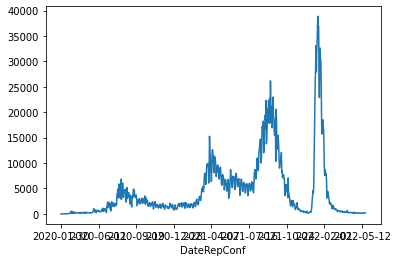

In [5]:
df_covid.groupby('DateRepConf').CaseCode.count().plot()

In [6]:
# Prepare longitudinal data for plotting
df_covid['DateRepConf'] = pd.to_datetime(df_covid.DateRepConf)

delta_subset = df_covid.loc[(df_covid.DateRepConf>=pd.to_datetime('2021-07-01')) & 
                            (df_covid.DateRepConf<=pd.to_datetime('2021-10-31'))]

<AxesSubplot:xlabel='DateRepConf'>

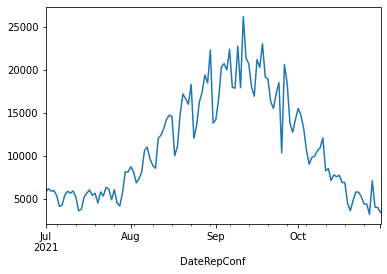

In [7]:
delta_subset.groupby('DateRepConf').CaseCode.count().plot()

In [8]:
base = delta_subset.groupby(['BarangayPSGC','DateRepConf']).CaseCode.count().reset_index().sort_values('DateRepConf')

In [9]:
base.loc[base.BarangayPSGC=='PH175917002']

,BarangayPSGC,DateRepConf,CaseCode
528060,PH175917002,2021-07-01,1
528061,PH175917002,2021-07-02,1
528062,PH175917002,2021-07-03,3
528063,PH175917002,2021-07-04,2
528064,PH175917002,2021-07-19,1
528065,PH175917002,2021-07-31,5
528066,PH175917002,2021-08-02,7
528067,PH175917002,2021-08-06,1
528068,PH175917002,2021-08-08,1
528069,PH175917002,2021-08-14,5


In [10]:
# Plot Metro Manila data only
mm_bnd = df_bnd.loc[df_bnd.Reg_Code=='PH130000000']

# compute cumulative cases per barangay per date
base['cumsum'] = base[['BarangayPSGC','CaseCode']].groupby('BarangayPSGC').cumsum(skipna=False)

In [11]:
base.describe()

,CaseCode,cumsum
count,528096.000000,528096.000000
mean,2.530263,77.402927
std,3.833914,190.298544
min,1.000000,1.000000
25%,1.000000,7.000000
50%,1.000000,21.000000
75%,2.000000,60.000000
max,216.000000,3079.000000


In [12]:
base.loc[base.BarangayPSGC=='PH175917002']

,BarangayPSGC,DateRepConf,CaseCode,cumsum
528060,PH175917002,2021-07-01,1,1
528061,PH175917002,2021-07-02,1,2
528062,PH175917002,2021-07-03,3,5
528063,PH175917002,2021-07-04,2,7
528064,PH175917002,2021-07-19,1,8
528065,PH175917002,2021-07-31,5,13
528066,PH175917002,2021-08-02,7,20
528067,PH175917002,2021-08-06,1,21
528068,PH175917002,2021-08-08,1,22
528069,PH175917002,2021-08-14,5,27


In [ ]:
for i,date in enumerate(base['DateRepConf'].sort_values().unique()):
    seg = base.loc[base.DateRepConf==date]
    a = mm_bnd.merge(seg, left_on='Bgy_Code', right_on='BarangayPSGC', how='left')
    a['cumsum'].fillna(0,inplace=True)
    a.plot(column='cumsum', 
           legend=True, 
           cmap='OrRd',
           vmin=0, 
           vmax=3100, 
           # TODO: Fix intervals using mapclassify and classification_kwd param
           k=5,
           antialiased=False).get_figure().savefig(f"plots/{date}.jpg")

### NOTES
- Use cumulative sum instead of case counts per day, because counts are daily snapshots per location. What we want to see are the growth of cases over time and space to see if there are geospatial clustering and trends
- Main challenge of choropleth mapping is setting and configuring the intervals in the distribution for consistent colors across time and space. 

### REFERENCES
- [Computing cumulative sum in pandas](https://datagy.io/pandas-cumulative-sum/)
- [Plotting choropleth without outline of polygons](https://stackoverflow.com/questions/55759070/geopandas-mapplotlib-how-do-i-plot-without-an-outline-around-any-shape)
- [Pooled classification for longitudinal spatial data](https://pysal.org/mapclassify/notebooks/04_pooled.html)